<a href="https://colab.research.google.com/github/cameronliddle/Algorithms/blob/main/AirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset
file_path = '/content/drive/MyDrive/Bejing/data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
file_path = '/content/drive/MyDrive/Bejing/data.csv'
df = pd.read_csv(file_path)

In [18]:
import pandas as pd

# Load the dataset (assuming the file is a CSV)
df = pd.read_csv('/content/drive/MyDrive/Bejing/data.csv')

# Display the first few rows to inspect the structure
df.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [19]:
# Get information about the dataset, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [21]:
df.drop('No', axis=1, inplace=True)

train, test = df[~df['pm2.5'].isnull()], df[df['pm2.5'].isnull()]

train.shape, test.shape

((41757, 12), (2067, 12))

In [22]:
train.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


<ipython-input-23-25d66d7d1318>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='cbwd', y='pm2.5', palette='flare')


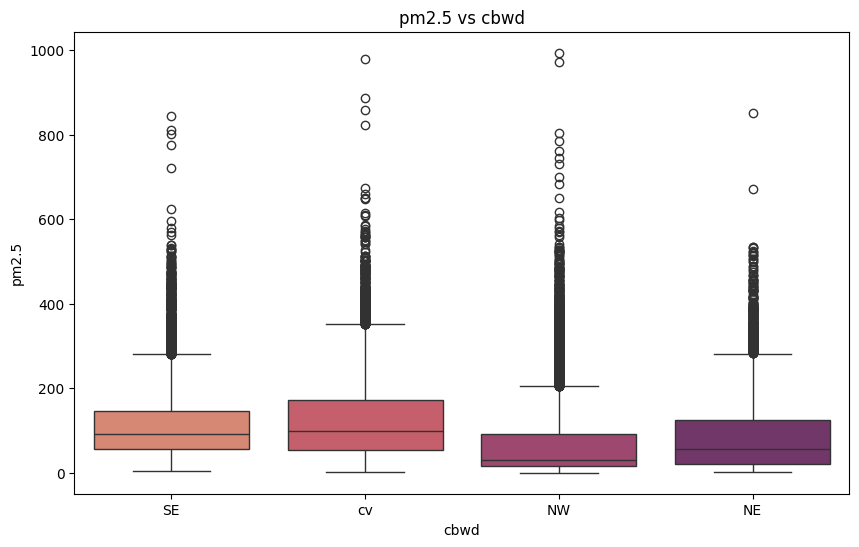

In [23]:
plt.figure(figsize=(10,6))
plt.title('pm2.5 vs cbwd')
sns.boxplot(data=train, x='cbwd', y='pm2.5', palette='flare')
plt.show()

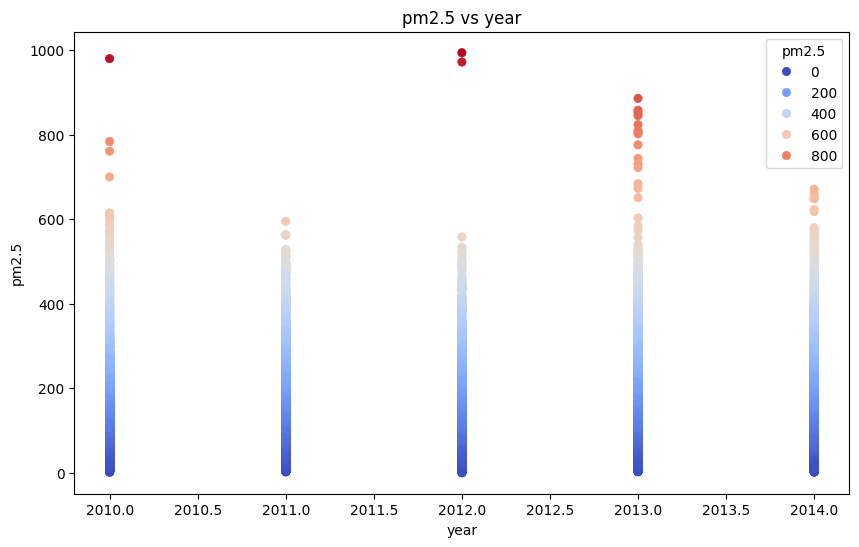

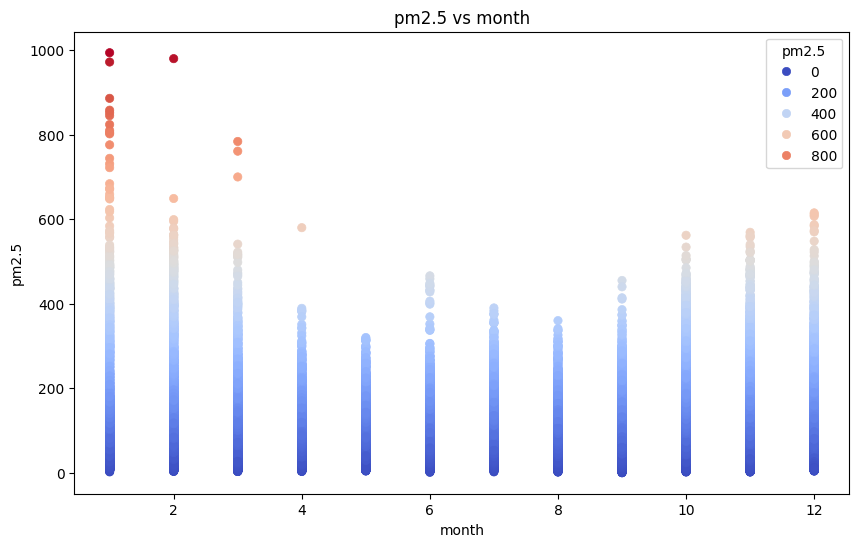

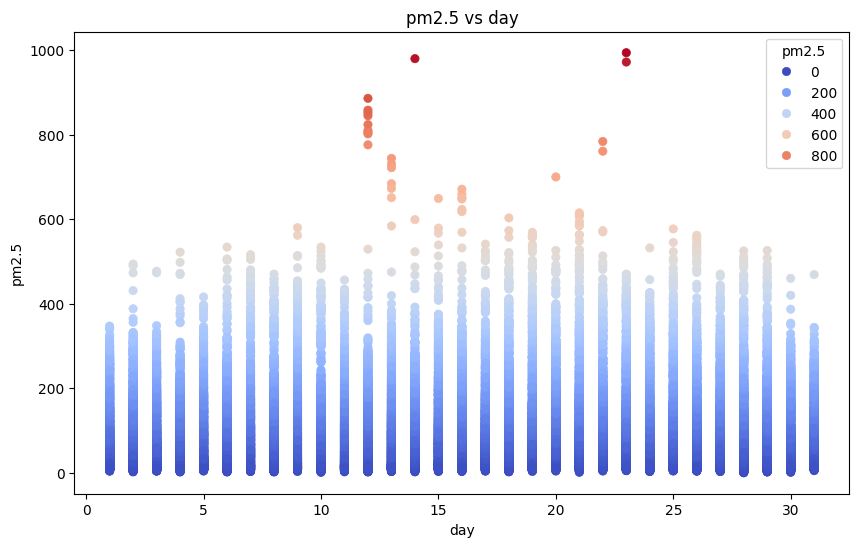

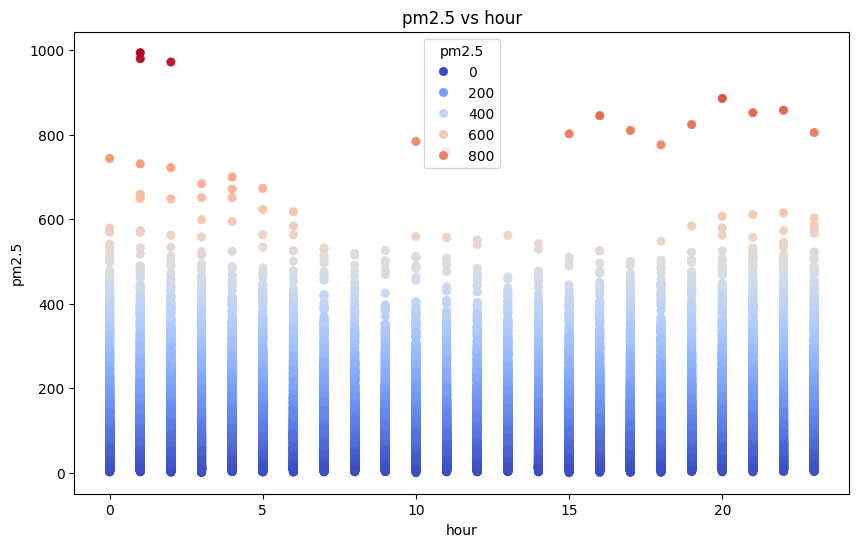

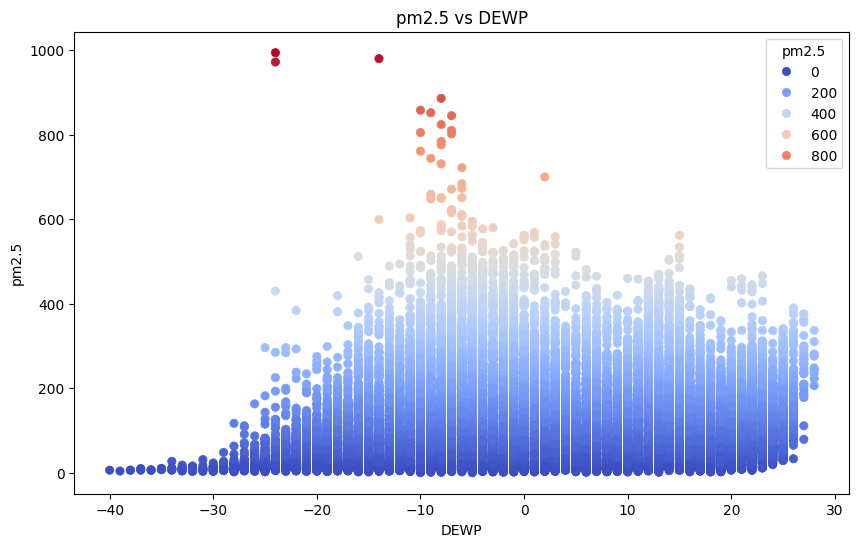

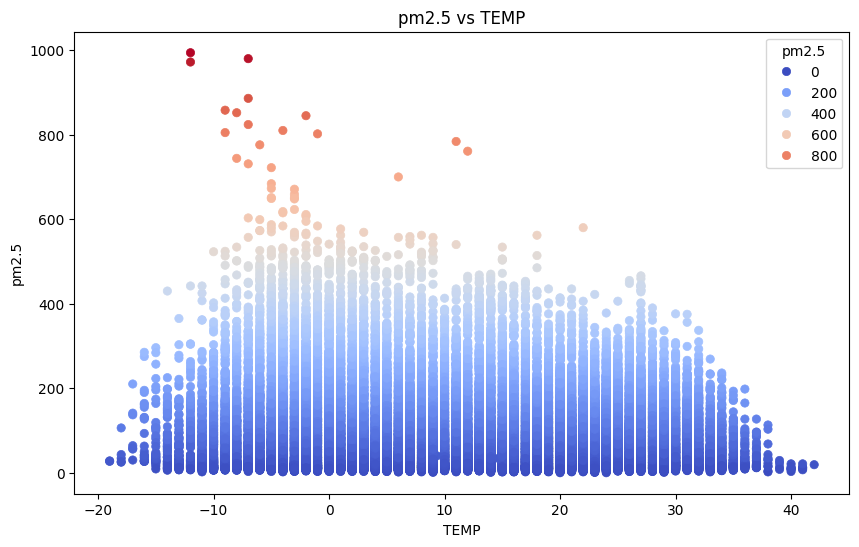

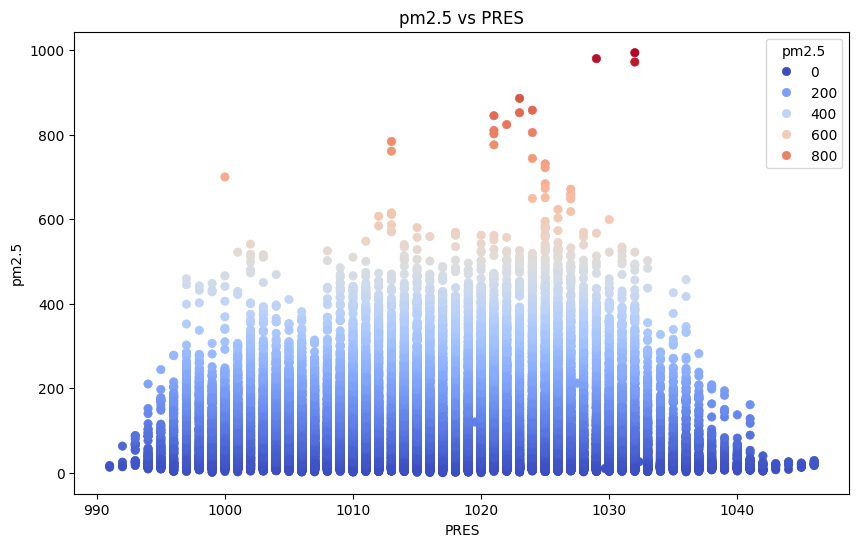

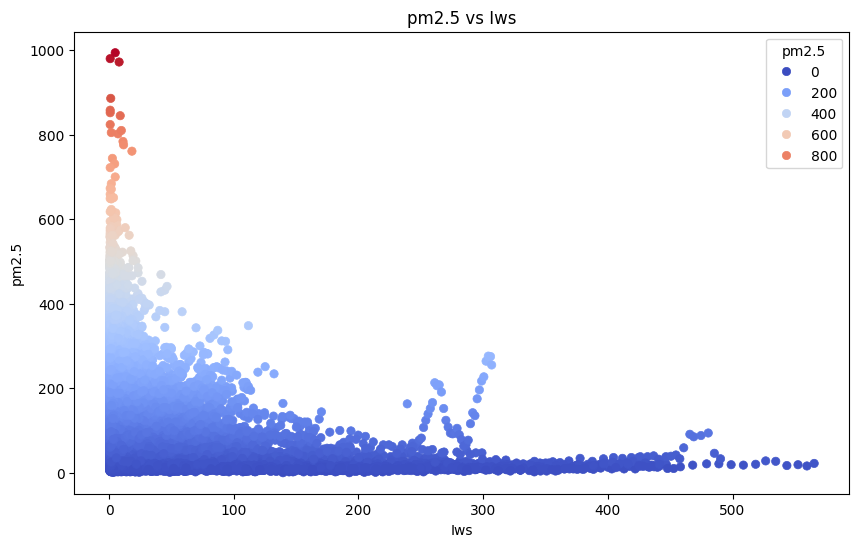

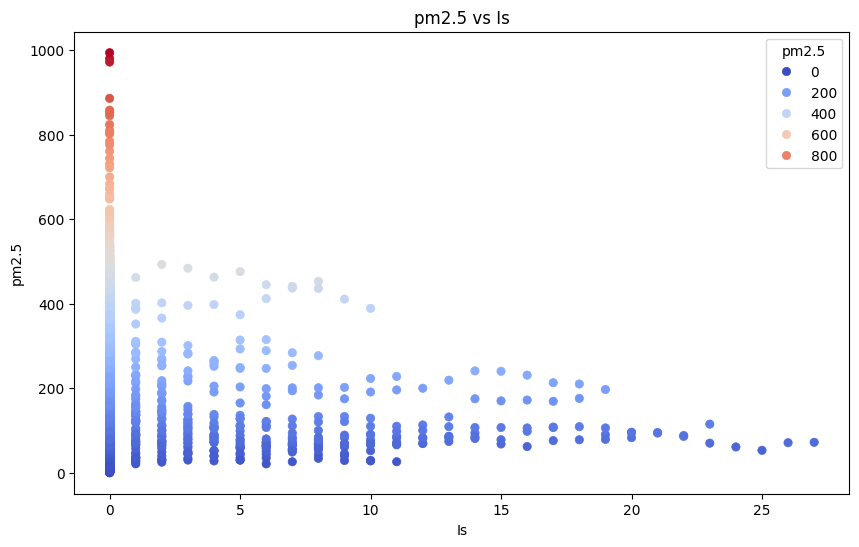

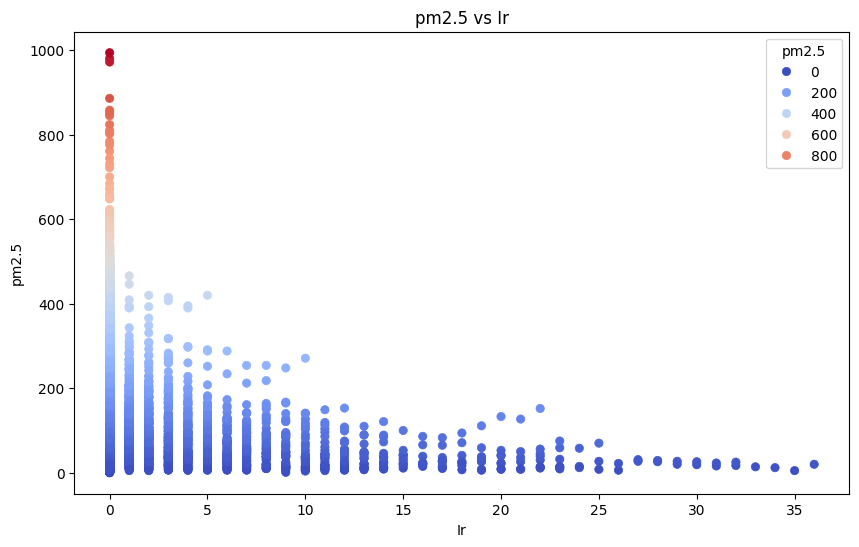

In [24]:
# Loop through all columns except 'pm2.5' and 'cbwd'
for col in train.drop(['pm2.5', 'cbwd'], axis=1).columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'pm2.5 vs {col}')

    # Plot the scatter plot with a continuous color map for better visualization
    sns.scatterplot(data=train, x=col, y='pm2.5', hue='pm2.5', palette='coolwarm', edgecolor=None)

    plt.show()


In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['cbwd'] = le.fit_transform(train['cbwd'])
test['cbwd'] = le.transform(test['cbwd'])

train.head()

<ipython-input-40-3b38421f00c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cbwd'] = le.fit_transform(train['cbwd'])
<ipython-input-40-3b38421f00c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cbwd'] = le.transform(test['cbwd'])


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,2,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,2,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,2,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,2,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,2,6.25,2,0


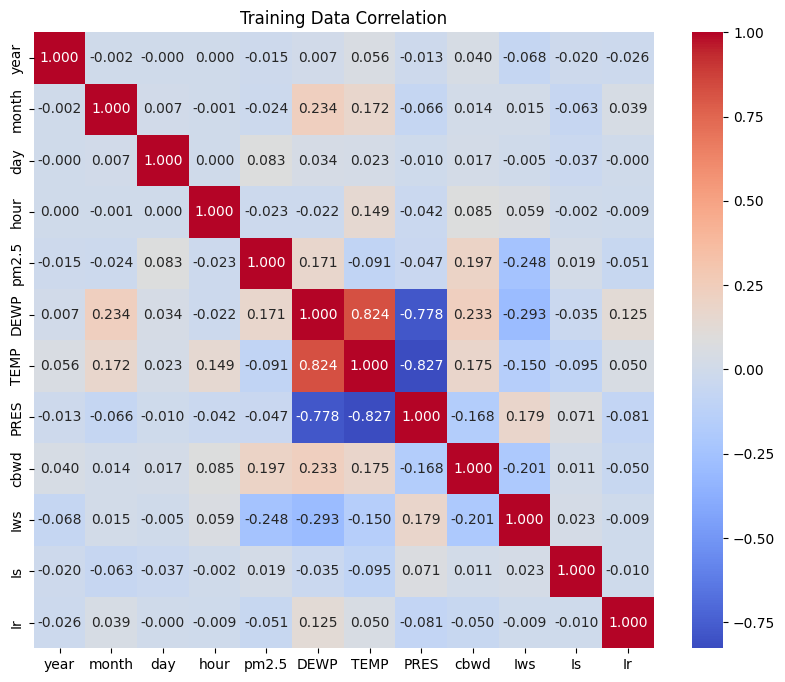

In [41]:
plt.figure(figsize=(10,8))
plt.title('Training Data Correlation')
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.show()

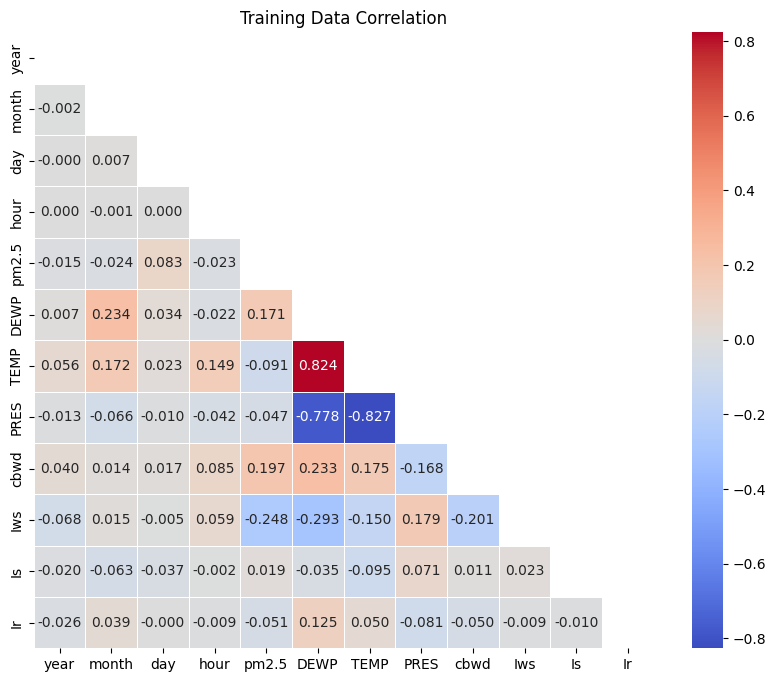

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out non-numeric columns for correlation calculation
numeric_columns = train.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
corr_matrix = train[numeric_columns].corr()

# Mask the upper triangle of the correlation matrix (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5, mask=mask)

# Title and display
plt.title('Training Data Correlation')
plt.show()


In [43]:
X = train.drop('pm2.5', axis=1)
y = train['pm2.5']

X.shape, y.shape

((41757, 11), (41757,))

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=0)

X_train.shape, X_valid.shape

((33405, 11), (8352, 11))

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_valid)

print(f'r2 score : {r2_score(y_valid, preds) * 100:.2f}%')
print(f'MAE score : {mean_absolute_error(y_valid, preds)}')
print(f'MSE score : {mean_squared_error(y_valid, preds)}')

r2 score : 84.77%
MAE score : 22.065063457854407
MSE score : 1257.998929513889


In [46]:
X_test = test.drop('pm2.5', axis=1)

test_preds = model.predict(X_test)

test['pm2.5'] = test_preds

test['cbwd'] = le.inverse_transform(test['cbwd'])

test.head()

<ipython-input-46-c02a0e9be7f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pm2.5'] = test_preds
<ipython-input-46-c02a0e9be7f7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cbwd'] = le.inverse_transform(test['cbwd'])


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,145.09,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,176.83,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,122.42,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,117.01,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,86.83,-20,-12.0,1018.0,NW,12.97,0,0


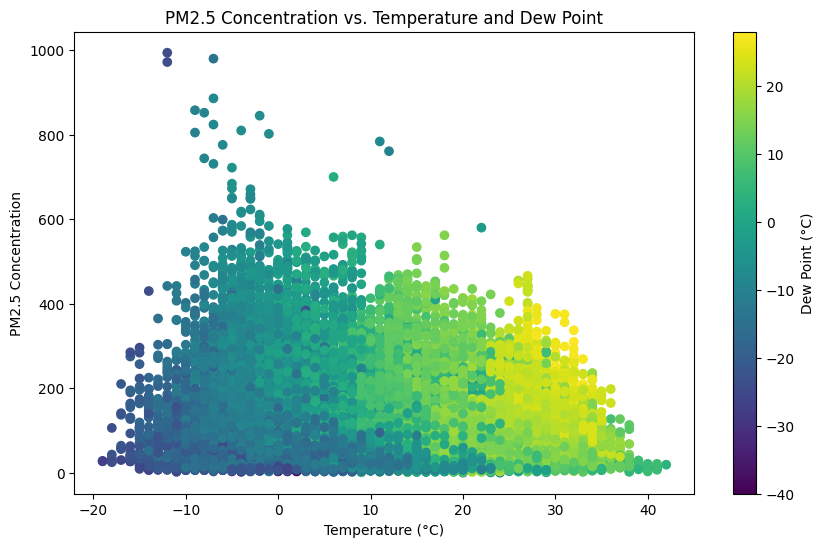

In [47]:
# @title PM2.5 Concentration vs. Temperature and Dew Point

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'

plt.figure(figsize=(10, 6))
plt.scatter(df['TEMP'], df['pm2.5'], c=df['DEWP'], cmap='viridis')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 Concentration')
plt.title('PM2.5 Concentration vs. Temperature and Dew Point')
_ = plt.colorbar(label='Dew Point (°C)')

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Bejing/data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [51]:
df = pd.read_csv("/content/drive/MyDrive/Bejing/data.csv")
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [52]:
df['Date'] = pd.to_datetime(df[['year','month','day','hour']])

In [53]:
df_pm25 = df[df['pm2.5'].isnull() == False]
df_pm25_testdata = df[df['pm2.5'].isnull() == True]

df_pm25.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Date
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


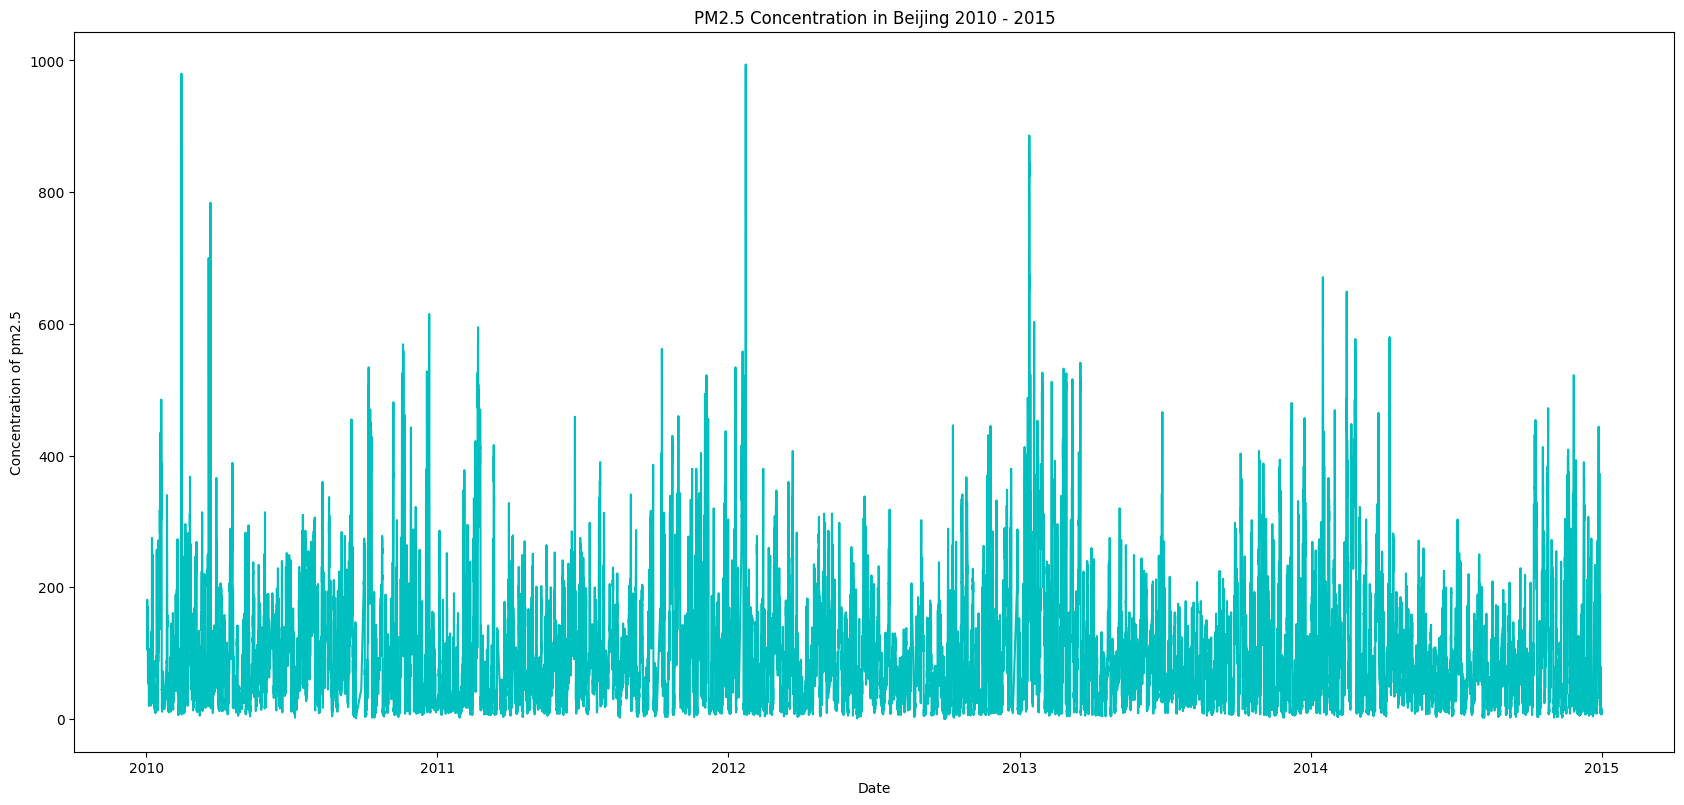

In [54]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1.5])
ax.plot(df_pm25['Date'],df_pm25['pm2.5'],'c')
plt.xlabel('Date')
plt.ylabel('Concentration of pm2.5')
plt.title('PM2.5 Concentration in Beijing 2010 - 2015')
plt.show()

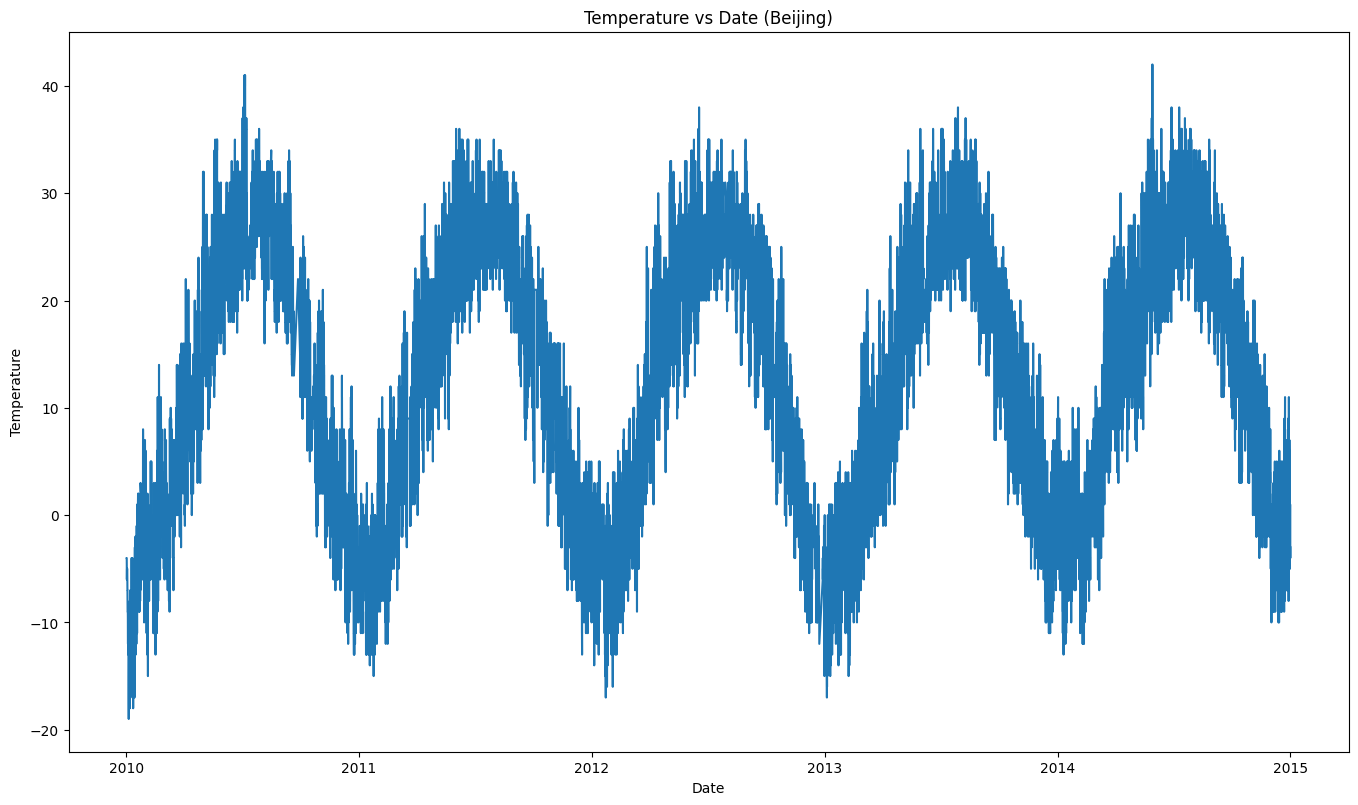

In [55]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1.5])
ax.plot(df_pm25['Date'],df_pm25['TEMP'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature vs Date (Beijing)')
plt.show()

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_pm25['cbwd'] = le.fit_transform(df_pm25['cbwd'])

df_pm25.head()

<ipython-input-56-c7c92a4c171f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25['cbwd'] = le.fit_transform(df_pm25['cbwd'])


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Date
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,2,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,2,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,2,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,2,6.25,2,0,2010-01-02 04:00:00


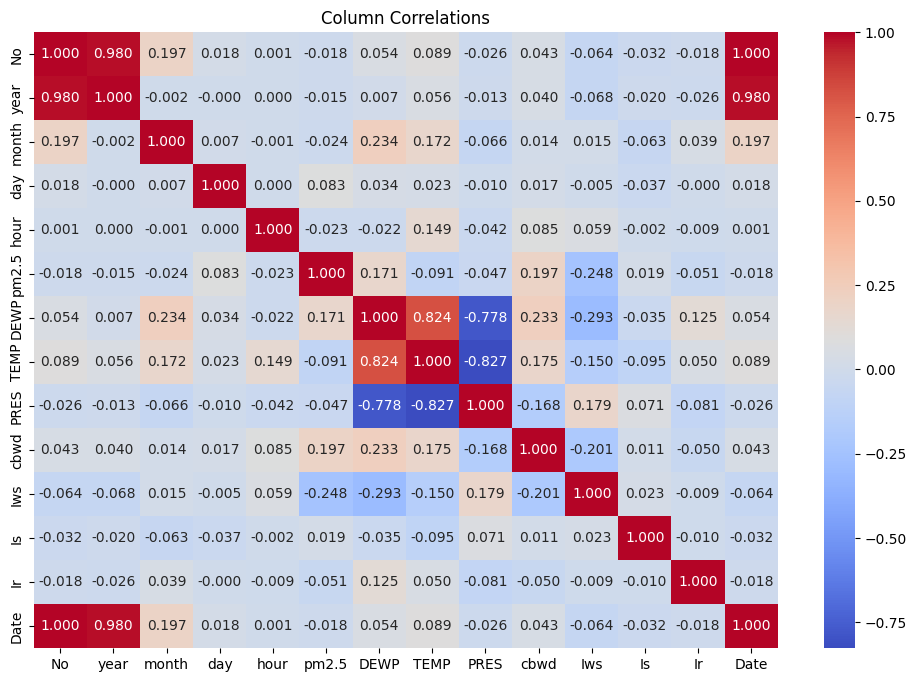

In [57]:
plt.figure(figsize=(12,8))
plt.title('Column Correlations')
sns.heatmap(df_pm25.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.show()

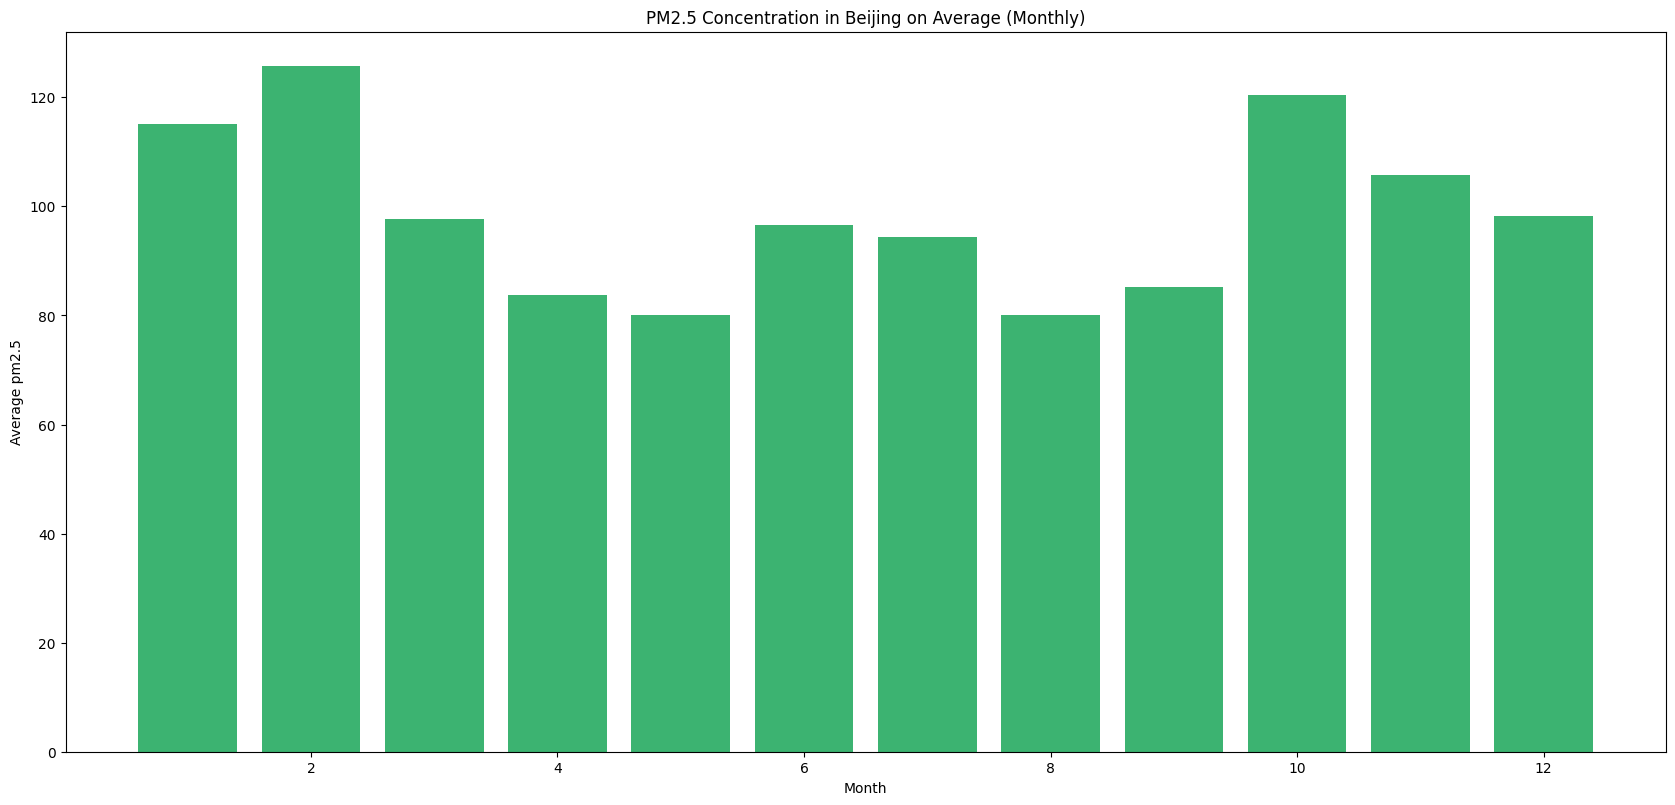

In [58]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1.5])
ax.bar(df_pm25['Date'].dt.month.unique(),df_pm25.groupby(df_pm25['Date'].dt.month).mean()['pm2.5'], color = 'mediumseagreen')
plt.xlabel('Month')
plt.ylabel('Average pm2.5')
plt.title('PM2.5 Concentration in Beijing on Average (Monthly)')
plt.show()

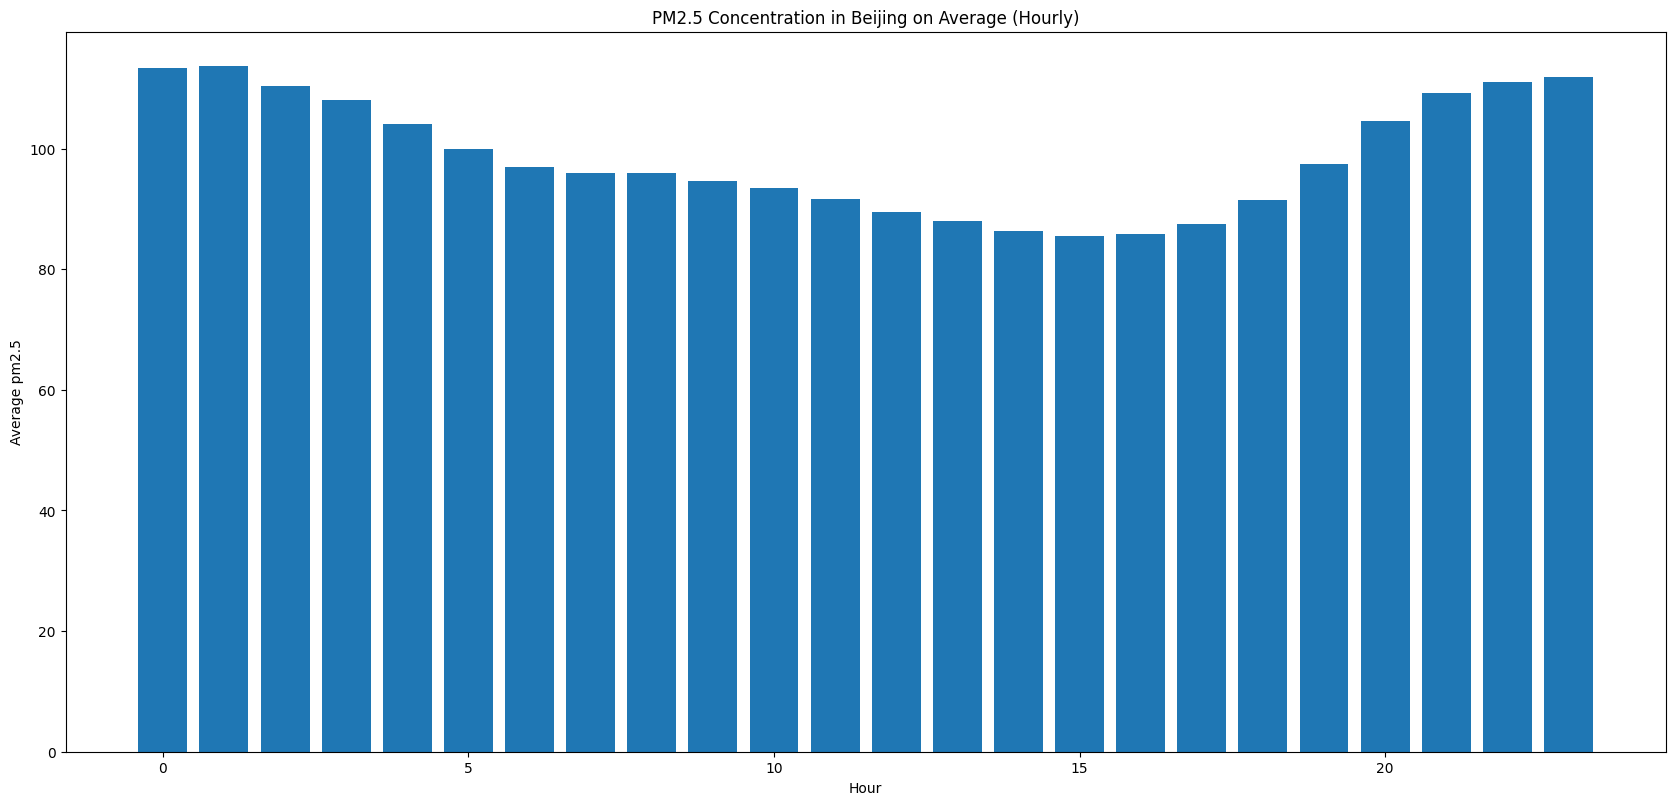

In [59]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1.5])
ax.bar(df_pm25['Date'].dt.hour.unique(),df_pm25.groupby(df_pm25['Date'].dt.hour).mean()['pm2.5'])
plt.xlabel('Hour')
plt.ylabel('Average pm2.5')
plt.title('PM2.5 Concentration in Beijing on Average (Hourly)')
plt.show()

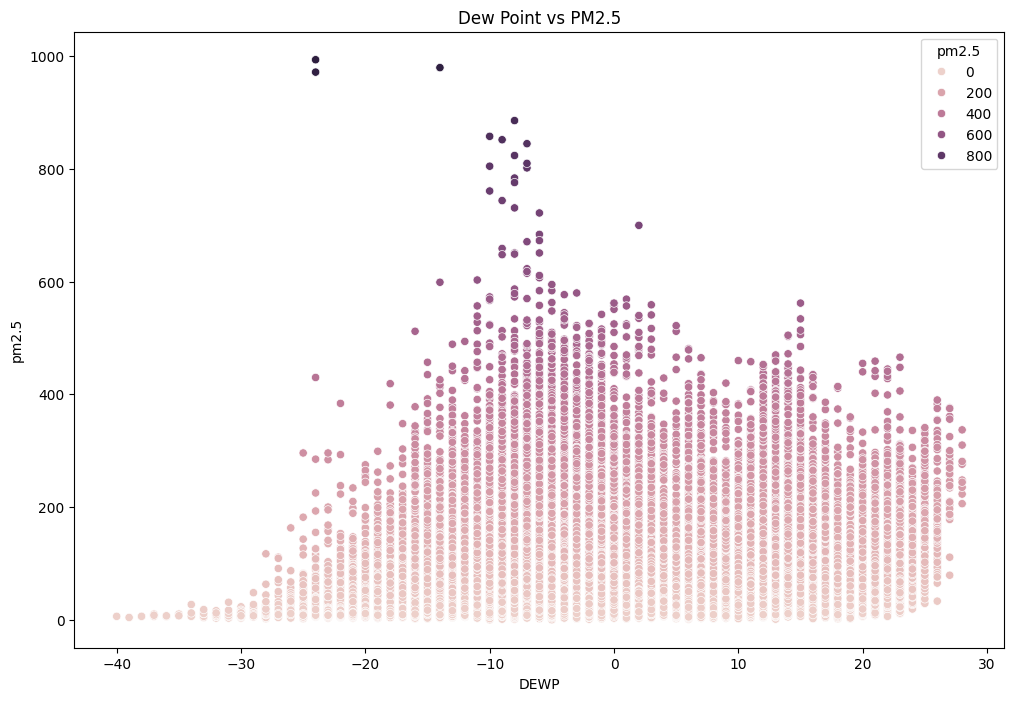

In [60]:
plt.figure(figsize=(12,8))
plt.title('Dew Point vs PM2.5')
sns.scatterplot(x="DEWP", y="pm2.5", data=df_pm25, hue = "pm2.5")
plt.show()

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can try different values for n_neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the validation set
preds_knn = knn_model.predict(X_valid)

# Evaluate the model
r2 = r2_score(y_valid, preds_knn)
mae = mean_absolute_error(y_valid, preds_knn)
mse = mean_squared_error(y_valid, preds_knn)

# Print results
print(f'R² score: {r2 * 100:.2f}%')
print(f'MAE: {mae}')
print(f'MSE: {mse}')


R² score: 70.11%
MAE: 32.73156130268199
MSE: 2468.871896551724


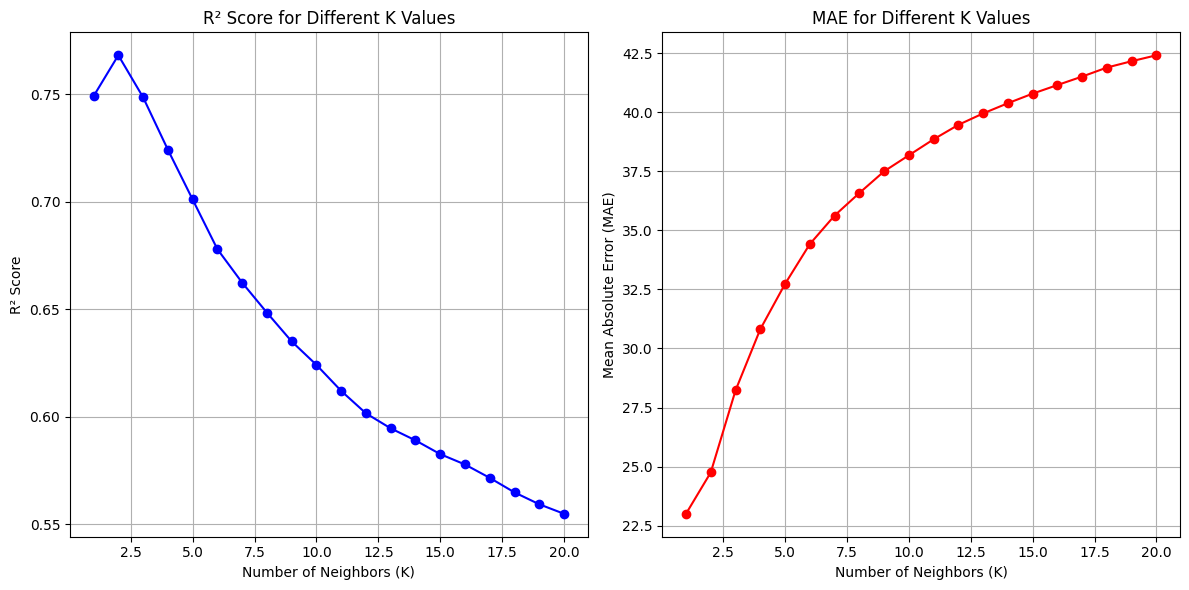

In [62]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# List of different K values to try
k_values = range(1, 21)  # You can increase this range if needed
r2_scores = []
mae_scores = []

# Loop through K values and train a KNN model for each
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)  # Fit model on training data
    preds = knn_model.predict(X_valid)  # Get predictions

    # Calculate R² and MAE for each value of K
    r2_scores.append(r2_score(y_valid, preds))
    mae_scores.append(mean_absolute_error(y_valid, preds))

# Plot the R² and MAE for each value of K
plt.figure(figsize=(12, 6))

# Plot R² scores
plt.subplot(1, 2, 1)
plt.plot(k_values, r2_scores, marker='o', color='b', label='R² Score')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R² Score')
plt.title('R² Score for Different K Values')
plt.grid(True)

# Plot MAE scores
plt.subplot(1, 2, 2)
plt.plot(k_values, mae_scores, marker='o', color='r', label='MAE')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Different K Values')
plt.grid(True)

plt.tight_layout()
plt.show()


In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_pm25['cbwd'] = le.fit_transform(df_pm25['cbwd'])

df_pm25.head()

<ipython-input-63-c7c92a4c171f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25['cbwd'] = le.fit_transform(df_pm25['cbwd'])


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Date
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,2,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,2,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,2,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,2,6.25,2,0,2010-01-02 04:00:00


In [67]:
# prompt: Using dataframe df_pm25: random forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the data
# Assuming 'pm2.5' is the target variable
X = df_pm25.drop(columns=['pm2.5', 'No', 'Date']) # Features
y = df_pm25['pm2.5']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can tune hyperparameters here
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model (example using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1475.1170468869732


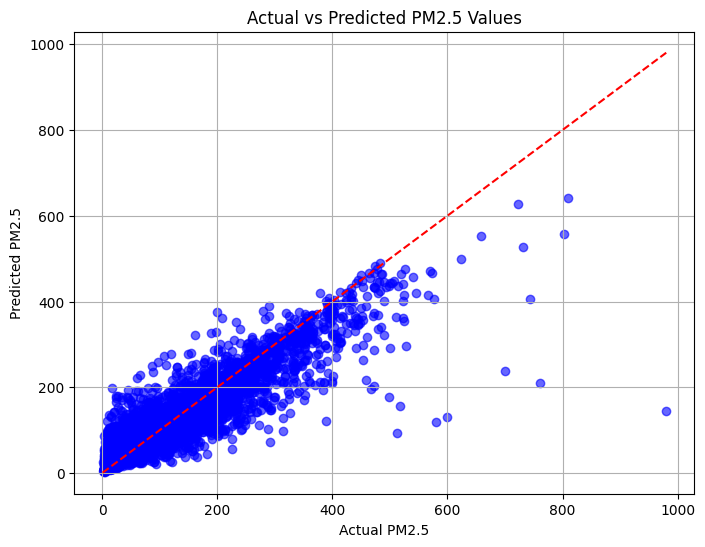

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted PM2.5 Values")
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.grid(True)
plt.show()


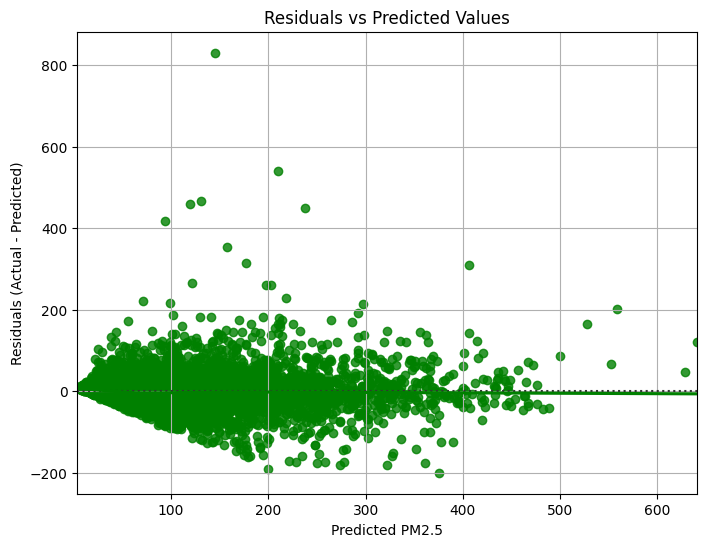

In [69]:
# Plot residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='green')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted PM2.5")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()


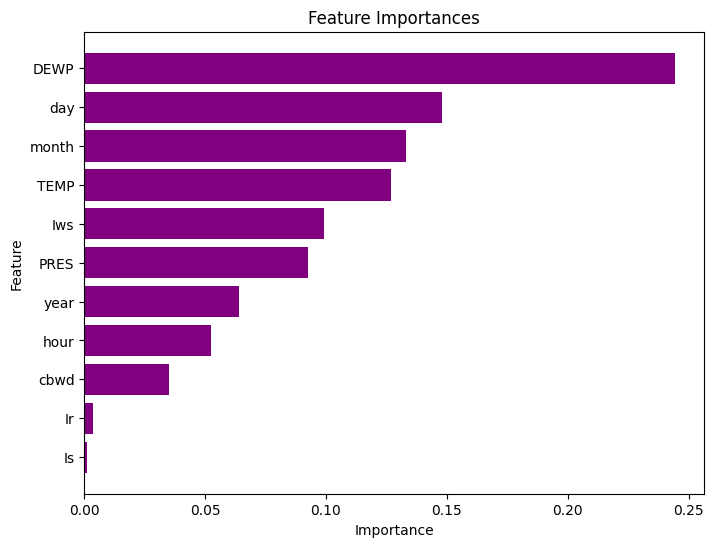

In [70]:
# Plot feature importances
importances = rf_model.feature_importances_
features = X_train.columns

# Sort feature importances in descending order
indices = importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(features[indices], importances[indices], color='purple')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


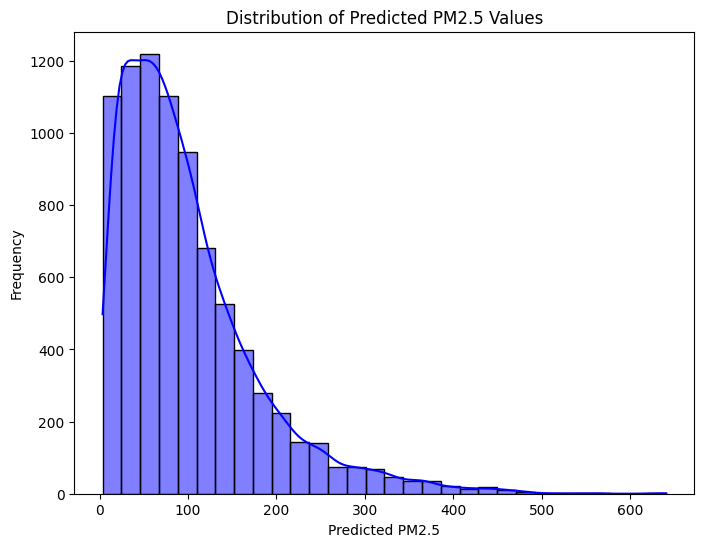

In [71]:
# Plot histogram of predictions
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, kde=True, color='blue', bins=30)
plt.title("Distribution of Predicted PM2.5 Values")
plt.xlabel("Predicted PM2.5")
plt.ylabel("Frequency")
plt.show()


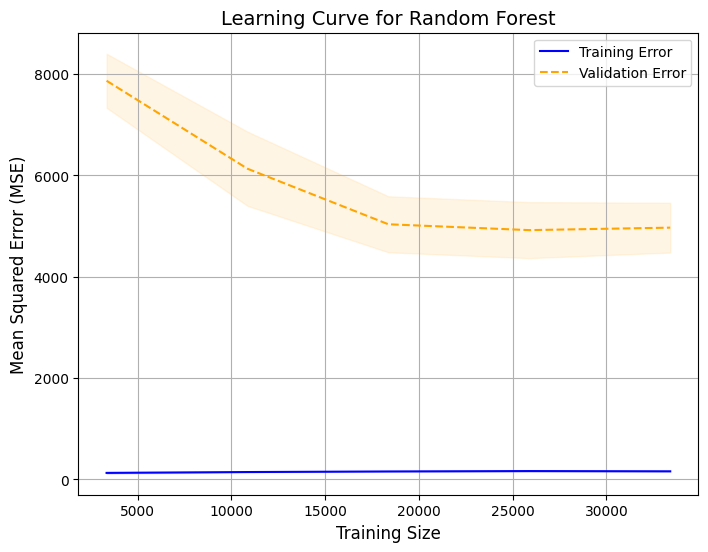

In [76]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for better readability
train_errors = -train_scores.mean(axis=1)
validation_errors = -test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors, label='Training Error', color='blue', linestyle='-')
plt.plot(train_sizes, validation_errors, label='Validation Error', color='orange', linestyle='--')

# Add error bars (optional)
plt.fill_between(train_sizes, train_errors - train_scores.std(axis=1), train_errors + train_scores.std(axis=1), color='blue', alpha=0.1)
plt.fill_between(train_sizes, validation_errors - test_scores.std(axis=1), validation_errors + test_scores.std(axis=1), color='orange', alpha=0.1)

# Add labels and title
plt.title("Learning Curve for Random Forest", fontsize=14)
plt.xlabel("Training Size", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)

# Add grid and legend
plt.legend(fontsize=10)
plt.grid(True)

# Show the plot
plt.show()




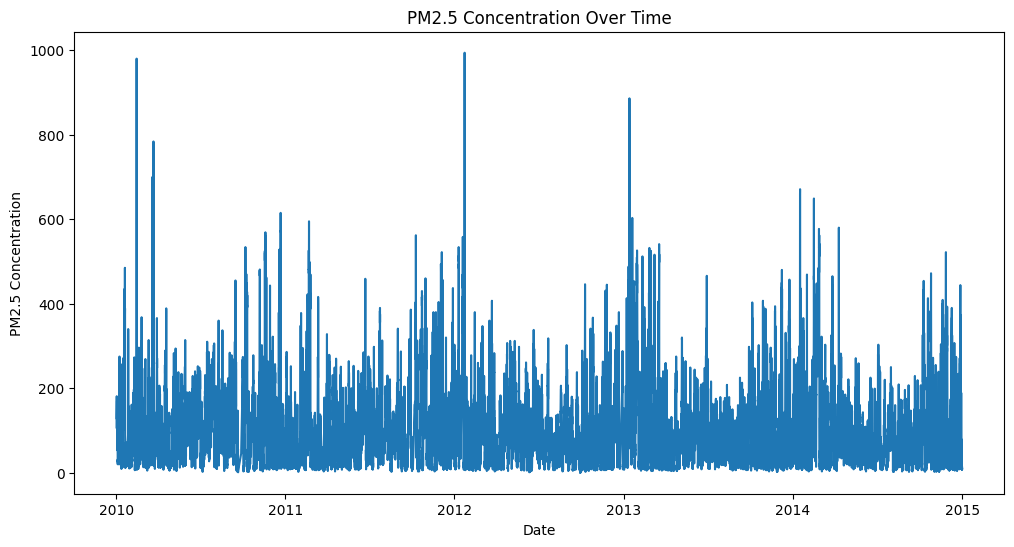

In [66]:
# @title PM2.5 Concentration Over Time

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df_pm25'

plt.figure(figsize=(12, 6))
plt.plot(df_pm25['Date'], df_pm25['pm2.5'])
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
_ = plt.title('PM2.5 Concentration Over Time')

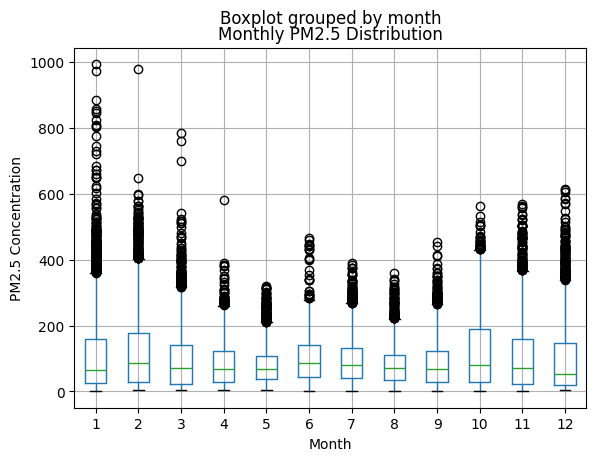

In [65]:
# @title Monthly PM2.5 Distribution

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df_pm25'

df_pm25.boxplot(column='pm2.5', by='month')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration')
_ = plt.title('Monthly PM2.5 Distribution')

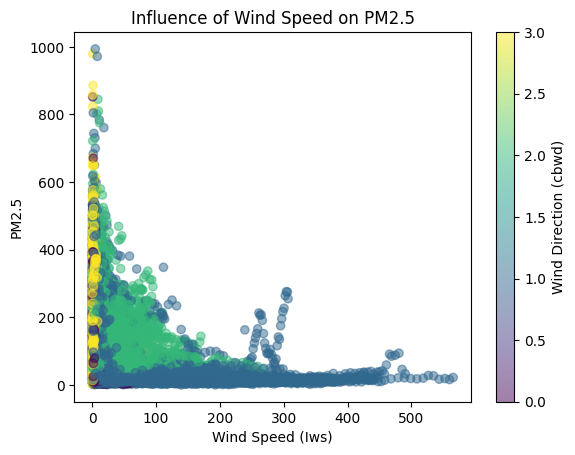

In [64]:
# @title Influence of Wind Speed on PM2.5

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df_pm25'

scatter = plt.scatter(df_pm25['Iws'], df_pm25['pm2.5'], c=df_pm25['cbwd'], alpha=0.5)
plt.title('Influence of Wind Speed on PM2.5')
plt.xlabel('Wind Speed (Iws)')
plt.ylabel('PM2.5')
_ = plt.colorbar(scatter, label='Wind Direction (cbwd)')